<a href="https://colab.research.google.com/github/MAboElFottouh/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Market-Project-TCS56EA/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [364]:
data = pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")

In [365]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [366]:
data.info() #show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [367]:
data.duplicated().sum() #check duplicated row

0

In [368]:
#split null object and numerical
def nAn():
  nan_name = []
  pans = []
  typeD = []
  for i in range(data.shape[1]):
    if (data.isna().sum()[i] != 0 ): #if have null only
      nan_name.append(data.columns[i])
      pans.append(data.isna().sum()[i] / data.shape[0] * 100)
      typeD.append(data[data.columns[i]].dtypes)
      print(data.isna().sum()[i],'\t' ,data.columns[i],'\t',data.isna().sum()[i] / data.shape[0] * 100 , '%')
  return nan_name ,pans , typeD

In [369]:
n , p , d= nAn();

84984 	 CreditGrade 	 74.58858843044841 %
58848 	 ClosedDate 	 51.64959582927408 %
25 	 BorrowerAPR 	 0.02194195037608503 %
29084 	 EstimatedEffectiveYield 	 25.52638738952228 %
29084 	 EstimatedLoss 	 25.52638738952228 %
29084 	 EstimatedReturn 	 25.52638738952228 %
29084 	 ProsperRating (numeric) 	 25.52638738952228 %
29084 	 ProsperRating (Alpha) 	 25.52638738952228 %
29084 	 ProsperScore 	 25.52638738952228 %
5515 	 BorrowerState 	 4.840394252964358 %
3588 	 Occupation 	 3.149108717975723 %
2255 	 EmploymentStatus 	 1.9791639239228696 %
7625 	 EmploymentStatusDuration 	 6.692294864705935 %
100596 	 GroupKey 	 88.29089760130599 %
591 	 CreditScoreRangeLower 	 0.5187077068906502 %
591 	 CreditScoreRangeUpper 	 0.5187077068906502 %
697 	 FirstRecordedCreditLine 	 0.6117415764852506 %
7604 	 CurrentCreditLines 	 6.673863626390022 %
7604 	 OpenCreditLines 	 6.673863626390022 %
697 	 TotalCreditLinespast7years 	 0.6117415764852506 %
697 	 InquiriesLast6Months 	 0.6117415764852506 %
1159 

In [370]:
for i in range(len(n)) :
  if p[i] > 50 :
    data.drop(n[i],axis=1, inplace= True)

In [371]:
n , p ,d= nAn()

25 	 BorrowerAPR 	 0.02194195037608503 %
29084 	 EstimatedEffectiveYield 	 25.52638738952228 %
29084 	 EstimatedLoss 	 25.52638738952228 %
29084 	 EstimatedReturn 	 25.52638738952228 %
29084 	 ProsperRating (numeric) 	 25.52638738952228 %
29084 	 ProsperRating (Alpha) 	 25.52638738952228 %
29084 	 ProsperScore 	 25.52638738952228 %
5515 	 BorrowerState 	 4.840394252964358 %
3588 	 Occupation 	 3.149108717975723 %
2255 	 EmploymentStatus 	 1.9791639239228696 %
7625 	 EmploymentStatusDuration 	 6.692294864705935 %
591 	 CreditScoreRangeLower 	 0.5187077068906502 %
591 	 CreditScoreRangeUpper 	 0.5187077068906502 %
697 	 FirstRecordedCreditLine 	 0.6117415764852506 %
7604 	 CurrentCreditLines 	 6.673863626390022 %
7604 	 OpenCreditLines 	 6.673863626390022 %
697 	 TotalCreditLinespast7years 	 0.6117415764852506 %
697 	 InquiriesLast6Months 	 0.6117415764852506 %
1159 	 TotalInquiries 	 1.0172288194353019 %
697 	 CurrentDelinquencies 	 0.6117415764852506 %
7622 	 AmountDelinquent 	 6.68966

In [372]:
for i in range(len(n)) :
  if d[i] == 'object' :
    data[n[i]].replace(np.nan,str(data[n[i]].mode()),inplace=True) 
  elif d[i] == 'int64' or d[i] == 'float64' :
    data[n[i]].replace(np.nan,float(data[n[i]].mean()),inplace=True) 
    data[n[i]].astype('float64')

In [373]:
n , p ,d= nAn()

now donot have null

In [374]:
data.drop('ProsperRating (numeric)',axis=1, inplace= True) #same data in ProsperRating (Alpha)

In [375]:
data[['LenderYield','BorrowerRate','BorrowerAPR']]

,LenderYield,BorrowerRate,BorrowerAPR
0,0.1380,0.1580,0.16516
1,0.0820,0.0920,0.12016
2,0.2400,0.2750,0.28269
3,0.0874,0.0974,0.12528
4,0.1985,0.2085,0.24614
...,...,...,...
113932,0.1764,0.1864,0.22354
113933,0.1010,0.1110,0.13220
113934,0.2050,0.2150,0.23984
113935,0.2505,0.2605,0.28408


In [376]:
def z_score(data,column,col_mean,col_std):
    outliers=[]
    ther=3
    for i in data :
        z=(i-col_mean)/col_std
        if np.abs(z)>3 :
            outliers.append(i)
            
    print("outliers in column ",column," is ",outliers)
            

In [377]:
def ty():
  float_D = []
  object_bool = []
  for i in data.columns:
    if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
      float_D.append(i)
    else :
      object_bool.append(i)
      

  return float_D ,object_bool


In [378]:
float_D ,object_bool = ty()

In [379]:
data_mean=[]
data_std=[]

for i in float_D:
  data_mean.append(data[i].mean())
  data_std.append(data[i].std())


In [380]:


for i in range(len(float_D)):
    if i =='BorrowerRate':
        continue 
    z_score(data[float_D[i]],float_D[i],data_mean[i],data_std[i])


outliers in column  ListingNumber  is  []
outliers in column  Term  is  []
outliers in column  BorrowerAPR  is  [0.46201, 0.51229, 0.50633, 0.48873]
outliers in column  BorrowerRate  is  [0.45, 0.45, 0.4975, 0.4975, 0.48, 0.45]
outliers in column  LenderYield  is  [0.4325, 0.4325, 0.4925, 0.48, 0.475, 0.4325]
outliers in column  EstimatedEffectiveYield  is  [-0.0677, -0.0354, -0.0251, -0.047, -0.0836, -0.0555, -0.0636, -0.0251, -0.0345, -0.0189, -0.0168, -0.0461, -0.0517, -0.1773, -0.0836, -0.0626, -0.0251, -0.0651, -0.0251, -0.0229, -0.0461, -0.0461, -0.0461, -0.0091, -0.0339, -0.0461, -0.0461, -0.0251, -0.0461, -0.1492, -0.0866, -0.0813, -0.0251, -0.0251, -0.0419, -0.0627, -0.0251, -0.1351, -0.0224, -0.0325, -0.0836, -0.1827, -0.0513, -0.0836, -0.0251, -0.0166, -0.01, -0.0251, -0.0524, -0.0613, -0.0138, -0.0461, -0.1403, -0.1023, -0.0673, -0.0332, -0.0461, -0.1304, -0.0224, -0.0866, -0.0107, -0.0816, -0.0266, -0.0461, -0.0138, -0.0251, -0.1679, -0.0794, -0.0102, -0.0859, -0.0253, -0.

In [381]:
# Mean-3*std ,mean+3*std 
def treat_outlier(data,col_mean,col_std):
    outliers=[]
    ther=3
    for i in range(len(data)) :
        z=(data[i]-col_mean)/col_std
        if np.abs(z)>3 :
            data[i]=np.nan

In [382]:

for i in range(len(float_D)):
    if i=='BorrowerRate':
        continue 
    treat_outlier(data[float_D[i]],data_mean[i],data_std[i])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [383]:
for i in range(len(float_D)):
    if i =='BorrowerRate':
        continue 
    z_score(data[float_D[i]],float_D[i],data_mean[i],data_std[i])

outliers in column  ListingNumber  is  []
outliers in column  Term  is  []
outliers in column  BorrowerAPR  is  []
outliers in column  BorrowerRate  is  []
outliers in column  LenderYield  is  []
outliers in column  EstimatedEffectiveYield  is  []
outliers in column  EstimatedLoss  is  []
outliers in column  EstimatedReturn  is  []
outliers in column  ProsperScore  is  []
outliers in column  ListingCategory (numeric)  is  []
outliers in column  EmploymentStatusDuration  is  []
outliers in column  CreditScoreRangeLower  is  []
outliers in column  CreditScoreRangeUpper  is  []
outliers in column  CurrentCreditLines  is  []
outliers in column  OpenCreditLines  is  []
outliers in column  TotalCreditLinespast7years  is  []
outliers in column  OpenRevolvingAccounts  is  []
outliers in column  OpenRevolvingMonthlyPayment  is  []
outliers in column  InquiriesLast6Months  is  []
outliers in column  TotalInquiries  is  []
outliers in column  CurrentDelinquencies  is  []
outliers in column  Amoun

now donot have outlier

In [384]:
data[['FirstRecordedCreditLine','LoanOriginationDate','ListingCreationDate','DateCreditPulled']]

,FirstRecordedCreditLine,LoanOriginationDate,ListingCreationDate,DateCreditPulled
0,2001-10-11 00:00:00,2007-09-12 00:00:00,2007-08-26 19:09:29.263000000,2007-08-26 18:41:46.780000000
1,1996-03-18 00:00:00,2014-03-03 00:00:00,2014-02-27 08:28:07.900000000,2014-02-27 08:28:14
2,2002-07-27 00:00:00,2007-01-17 00:00:00,2007-01-05 15:00:47.090000000,2007-01-02 14:09:10.060000000
3,1983-02-28 00:00:00,2012-11-01 00:00:00,2012-10-22 11:02:35.010000000,2012-10-22 11:02:32
4,2004-02-20 00:00:00,2013-09-20 00:00:00,2013-09-14 18:38:39.097000000,2013-09-14 18:38:44
...,...,...,...,...
113932,1997-09-01 00:00:00,2013-04-22 00:00:00,2013-04-14 05:55:02.663000000,2013-04-14 05:54:58
113933,1992-01-17 00:00:00,2011-11-07 00:00:00,2011-11-03 20:42:55.333000000,2011-11-03 20:42:53
113934,2002-02-25 00:00:00,2013-12-23 00:00:00,2013-12-13 05:49:12.703000000,2013-12-13 05:49:15
113935,1993-12-01 00:00:00,2011-11-21 00:00:00,2011-11-14 13:18:26.597000000,2011-11-14 13:18:24


In [385]:
data['FirstRecordedCreditLine_date'] = pd.to_datetime(data['FirstRecordedCreditLine'], errors='coerce')
data['LoanOriginationDate_date'] = pd.to_datetime(data['LoanOriginationDate'], errors='coerce')
data['ListingCreationDate_date'] = pd.to_datetime(data['ListingCreationDate'], errors='coerce')
data['DateCreditPulled_date'] = pd.to_datetime(data['DateCreditPulled'], errors='coerce')


In [386]:
data['FirstRecordedCreditLine_date_day'] = data['FirstRecordedCreditLine_date'].dt.day
data['FirstRecordedCreditLine_date_month'] = data['FirstRecordedCreditLine_date'].dt.month
data['FirstRecordedCreditLine_date_year'] = data['FirstRecordedCreditLine_date'].dt.year

In [387]:
data['LoanOriginationDate_date_day'] = data['LoanOriginationDate_date'].dt.day
data['LoanOriginationDate_date_month'] = data['LoanOriginationDate_date'].dt.month
data['LoanOriginationDate_date_year'] = data['LoanOriginationDate_date'].dt.year

In [388]:
data['ListingCreationDate_date_day'] = data['ListingCreationDate_date'].dt.day
data['ListingCreationDate_date_month'] = data['ListingCreationDate_date'].dt.month
data['ListingCreationDate_date_year'] = data['ListingCreationDate_date'].dt.year

In [389]:
data['DateCreditPulled_date_day'] = data['DateCreditPulled_date'].dt.day
data['DateCreditPulled_date_month'] = data['DateCreditPulled_date'].dt.month
data['DateCreditPulled_date_year'] = data['DateCreditPulled_date'].dt.year

In [390]:
data.drop('FirstRecordedCreditLine',axis=1, inplace= True)
data.drop('LoanOriginationDate',axis=1, inplace= True)
data.drop('ListingCreationDate',axis=1, inplace= True)
data.drop('DateCreditPulled',axis=1, inplace= True)

data.drop('FirstRecordedCreditLine_date',axis=1, inplace= True)
data.drop('LoanOriginationDate_date',axis=1, inplace= True)
data.drop('ListingCreationDate_date',axis=1, inplace= True)
data.drop('DateCreditPulled_date',axis=1, inplace= True)

In [391]:
data['FirstRecordedCreditLine_date_day'] = data['FirstRecordedCreditLine_date_day'].astype({"FirstRecordedCreditLine_date_day": str}, errors='raise') 
data['FirstRecordedCreditLine_date_month'] = data['FirstRecordedCreditLine_date_month'].astype({"FirstRecordedCreditLine_date_month": str}, errors='raise') 
data['FirstRecordedCreditLine_date_year'] = data['FirstRecordedCreditLine_date_year'].astype({"FirstRecordedCreditLine_date_year": str}, errors='raise') 


In [392]:
data['LoanOriginationDate_date_day'] = data['LoanOriginationDate_date_day'].astype({"LoanOriginationDate_date_day": str}, errors='raise') 
data['LoanOriginationDate_date_month'] = data['LoanOriginationDate_date_month'].astype({"LoanOriginationDate_date_month": str}, errors='raise') 
data['LoanOriginationDate_date_year'] = data['LoanOriginationDate_date_year'].astype({"LoanOriginationDate_date_year": str}, errors='raise') 


In [393]:
data['ListingCreationDate_date_day'] = data['ListingCreationDate_date_day'].astype({"ListingCreationDate_date_day": str}, errors='raise') 
data['ListingCreationDate_date_month'] = data['ListingCreationDate_date_month'].astype({"ListingCreationDate_date_month": str}, errors='raise') 
data['ListingCreationDate_date_year'] = data['ListingCreationDate_date_year'].astype({"ListingCreationDate_date_year": str}, errors='raise') 


In [394]:
data['DateCreditPulled_date_day'] = data['DateCreditPulled_date_day'].astype({"DateCreditPulled_date_day": str}, errors='raise') 
data['DateCreditPulled_date_month'] = data['DateCreditPulled_date_month'].astype({"DateCreditPulled_date_month": str}, errors='raise') 
data['DateCreditPulled_date_year'] = data['DateCreditPulled_date_year'].astype({"DateCreditPulled_date_year": str}, errors='raise') 


In [395]:
n , p ,d= nAn()

4 	 BorrowerAPR 	 0.0035107120601736044 %
6 	 BorrowerRate 	 0.005266068090260407 %
6 	 LenderYield 	 0.005266068090260407 %
170 	 EstimatedEffectiveYield 	 0.1492052625573782 %
446 	 EstimatedLoss 	 0.39144439470935694 %
915 	 EstimatedReturn 	 0.803075383764712 %
4302 	 ListingCategory (numeric) 	 3.775770820716712 %
2078 	 EmploymentStatusDuration 	 1.8238149152601877 %
662 	 CreditScoreRangeLower 	 0.5810228459587315 %
662 	 CreditScoreRangeUpper 	 0.5810228459587315 %
1166 	 CurrentCreditLines 	 1.0233725655406058 %
1476 	 OpenCreditLines 	 1.2954527502040603 %
998 	 TotalCreditLinespast7years 	 0.8759226590133143 %
1621 	 OpenRevolvingAccounts 	 1.4227160623853534 %
2132 	 OpenRevolvingMonthlyPayment 	 1.8712095280725312 %
2204 	 InquiriesLast6Months 	 1.9344023451556562 %
2053 	 TotalInquiries 	 1.8018729648841028 %
2342 	 CurrentDelinquencies 	 2.0555219112316454 %
1157 	 AmountDelinquent 	 1.0154734634052152 %
2880 	 DelinquenciesLast7Years 	 2.5277126833249954 %
1592 	 Public

In [396]:

for i in range(len(n)) :
  if d[i] == 'object' :
    data[n[i]].replace(np.nan,str(data[n[i]].mode()),inplace=True) 
  elif d[i] == 'int64' or d[i] == 'float64' :
    data[n[i]].replace(np.nan,float(data[n[i]].mean()),inplace=True) 
    data[n[i]].astype('float64')


In [397]:
j=0
for i in data.columns:
  print(data.isna().sum()[j],data[i].dtypes,i)
  j+=1

0 object ListingKey
0 int64 ListingNumber
0 int64 Term
0 object LoanStatus
0 float64 BorrowerAPR
0 float64 BorrowerRate
0 float64 LenderYield
0 float64 EstimatedEffectiveYield
0 float64 EstimatedLoss
0 float64 EstimatedReturn
0 object ProsperRating (Alpha)
0 float64 ProsperScore
0 float64 ListingCategory (numeric)
0 object BorrowerState
0 object Occupation
0 object EmploymentStatus
0 float64 EmploymentStatusDuration
0 bool IsBorrowerHomeowner
0 bool CurrentlyInGroup
0 float64 CreditScoreRangeLower
0 float64 CreditScoreRangeUpper
0 float64 CurrentCreditLines
0 float64 OpenCreditLines
0 float64 TotalCreditLinespast7years
0 float64 OpenRevolvingAccounts
0 float64 OpenRevolvingMonthlyPayment
0 float64 InquiriesLast6Months
0 float64 TotalInquiries
0 float64 CurrentDelinquencies
0 float64 AmountDelinquent
0 float64 DelinquenciesLast7Years
0 float64 PublicRecordsLast10Years
0 float64 PublicRecordsLast12Months
0 float64 RevolvingCreditBalance
0 float64 BankcardUtilization
0 float64 AvailableBa

In [398]:
data['FirstRecordedCreditLine_date_day']=data['FirstRecordedCreditLine_date_day'].astype('float64')
data['FirstRecordedCreditLine_date_month']=data['FirstRecordedCreditLine_date_month'].astype('float64')
data['FirstRecordedCreditLine_date_year']=data['FirstRecordedCreditLine_date_year'].astype('float64')
data['LoanOriginationDate_date_day']=data['LoanOriginationDate_date_day'].astype('float64')
data['LoanOriginationDate_date_month']=data['LoanOriginationDate_date_month'].astype('float64')
data['LoanOriginationDate_date_year']=data['LoanOriginationDate_date_year'].astype('float64')
data['ListingCreationDate_date_day']=data['ListingCreationDate_date_day'].astype('float64')
data['ListingCreationDate_date_month']=data['ListingCreationDate_date_month'].astype('float64')
data['ListingCreationDate_date_year']=data['ListingCreationDate_date_year'].astype('float64')
data['DateCreditPulled_date_day']=data['DateCreditPulled_date_day'].astype('float64')
data['DateCreditPulled_date_month']=data['DateCreditPulled_date_month'].astype('float64')
data['DateCreditPulled_date_year']=data['DateCreditPulled_date_year'].astype('float64')



In [399]:
data['FirstRecordedCreditLine_date_day'].replace(np.nan,float(data['FirstRecordedCreditLine_date_day'].mode()),inplace=True) 
data['FirstRecordedCreditLine_date_month'].replace(np.nan,float(data['FirstRecordedCreditLine_date_month'].mode()),inplace=True) 
data['FirstRecordedCreditLine_date_year'].replace(np.nan,float(data['FirstRecordedCreditLine_date_year'].mode()),inplace=True) 

In [400]:
float_D ,object_bool = ty()

In [401]:
#columns unique  
for i in object_bool :
  if data[i].nunique() > 90000:
    print(data[i].nunique() , '\t' , i)
    data.drop(i,axis=1, inplace= True)    

113066 	 ListingKey
113066 	 LoanKey
90831 	 MemberKey


In [402]:
float_D ,object_bool = ty()

In [403]:

for i in object_bool :
  print(data[i].nunique() , '\t' , i)  

12 	 LoanStatus
8 	 ProsperRating (Alpha)
52 	 BorrowerState
68 	 Occupation
9 	 EmploymentStatus
2 	 IsBorrowerHomeowner
2 	 CurrentlyInGroup
8 	 IncomeRange
2 	 IncomeVerifiable
33 	 LoanOriginationQuarter


encoder

In [404]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for j in range(len(object_bool)):
  #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
  X = onehotencoder.fit_transform(data[object_bool[j]].values.reshape(-1,1)).toarray()
  #To add this back into the original dataframe 
  dfOneHot = pd.DataFrame(X, columns = [object_bool[j]+str(int(i)) for i in range(data[object_bool[j]].nunique())]) 
  data = pd.concat([data, dfOneHot], axis=1)
  #droping the country column 
  data= data.drop([object_bool[j]], axis=1) 
  #printing to verify 
  print(data.head())

   ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0         193129    36      0.16516        0.1580       0.1380   
1        1209647    36      0.12016        0.0920       0.0820   
2          81716    36      0.28269        0.2750       0.2400   
3         658116    36      0.12528        0.0974       0.0874   
4         909464    36      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                 0.168661       0.080306         0.096068   
1                 0.079600       0.024900         0.054700   
2                 0.168661       0.080306         0.096068   
3                 0.084900       0.024900         0.060000   
4                 0.183160       0.092500         0.090660   

   ProsperRating (Alpha)  ProsperScore  ...  LoanStatus2 LoanStatus3  \
0  0    C\ndtype: object      5.950067  ...          1.0         0.0   
1                      A      7.000000  ...          0.0         1.0   
2  0    C\ndty

In [405]:
float_D ,object_bool = ty()

for i in object_bool :
  print(data[i].nunique() , '\t' , i)  

no object columns

In [406]:
data.shape

(113937, 259)

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 259 entries, ListingNumber to LoanOriginationQuarter32
dtypes: float64(255), int64(4)
memory usage: 225.1 MB


In [408]:
data['BorrowerRateTarget'] = data['BorrowerRate']
data.drop('BorrowerRate',axis=1, inplace= True)

In [409]:
corr=data.corr()


In [410]:
corr

,ListingNumber,Term,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,...,LoanOriginationQuarter24,LoanOriginationQuarter25,LoanOriginationQuarter26,LoanOriginationQuarter27,LoanOriginationQuarter28,LoanOriginationQuarter29,LoanOriginationQuarter30,LoanOriginationQuarter31,LoanOriginationQuarter32,BorrowerRateTarget
ListingNumber,1.000000,0.319971,-0.031286,-0.113214,-0.139820,-0.147020,-0.302344,-0.066043,0.104712,0.122232,...,-0.026596,-0.254306,-0.186258,-0.046790,-0.068607,-0.053927,-0.051786,0.021715,0.434500,-0.114059
Term,0.319971,1.000000,-0.011130,0.020653,0.052893,-0.099385,0.157068,0.027862,-0.022922,0.082892,...,-0.006432,-0.067936,-0.070617,-0.031701,-0.052530,-0.052149,-0.080524,0.055308,0.122324,0.020183
BorrowerAPR,-0.031286,-0.011130,1.000000,0.989015,0.783230,0.821902,0.702284,-0.573682,0.138687,-0.008734,...,0.000002,-0.028036,-0.073464,0.004918,0.003456,0.085399,0.100159,0.062705,-0.066780,0.989508
LenderYield,-0.113214,0.020653,0.989015,1.000000,0.788508,0.824167,0.727123,-0.561821,0.112604,-0.016696,...,-0.018584,0.003897,-0.041498,0.007248,0.010027,0.081023,0.088226,0.050775,-0.092937,0.999211
EstimatedEffectiveYield,-0.139820,0.052893,0.783230,0.788508,1.000000,0.882873,0.816400,-0.650061,0.090301,-0.021985,...,-0.000079,-0.000833,-0.000866,-0.000389,-0.106280,-0.089368,0.134627,0.065131,-0.102077,0.785265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LoanOriginationQuarter29,-0.053927,-0.052149,0.085399,0.081023,-0.089368,0.060690,0.064297,0.029527,0.043016,-0.008577,...,-0.001659,-0.017517,-0.018209,-0.008174,-0.013545,1.000000,-0.022507,-0.023990,-0.045483,0.080685
LoanOriginationQuarter30,-0.051786,-0.080524,0.100159,0.088226,0.134627,0.073687,0.155820,-0.009062,0.059244,-0.005286,...,-0.002621,-0.027681,-0.028774,-0.012917,-0.021404,-0.022507,1.000000,-0.037909,-0.071872,0.087711
LoanOriginationQuarter31,0.021715,0.055308,0.062705,0.050775,0.065131,0.031298,0.053435,0.038673,0.057784,0.011727,...,-0.002793,-0.029505,-0.030670,-0.013768,-0.022814,-0.023990,-0.037909,1.000000,-0.076608,0.050401
LoanOriginationQuarter32,0.434500,0.122324,-0.066780,-0.092937,-0.102077,-0.076587,-0.223027,-0.032954,-0.036691,0.055201,...,-0.005296,-0.055940,-0.058148,-0.026103,-0.043255,-0.045483,-0.071872,-0.076608,1.000000,-0.092882


In [411]:
data.drop('BorrowerAPR',axis=1, inplace= True) # 0.99
data.drop('LenderYield',axis=1, inplace= True) #1.00
data.drop('ListingNumber',axis=1, inplace= True)

In [412]:
corr=data.corr()
corr

,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,...,LoanOriginationQuarter24,LoanOriginationQuarter25,LoanOriginationQuarter26,LoanOriginationQuarter27,LoanOriginationQuarter28,LoanOriginationQuarter29,LoanOriginationQuarter30,LoanOriginationQuarter31,LoanOriginationQuarter32,BorrowerRateTarget
Term,1.000000,0.052893,-0.099385,0.157068,0.027862,-0.022922,0.082892,0.125002,0.125002,0.079386,...,-6.432049e-03,-6.793627e-02,-7.061722e-02,-3.170065e-02,-0.052530,-0.052149,-0.080524,0.055308,0.122324,0.020183
EstimatedEffectiveYield,0.052893,1.000000,0.882873,0.816400,-0.650061,0.090301,-0.021985,-0.306726,-0.306726,-0.088861,...,-7.888893e-05,-8.332367e-04,-8.661185e-04,-3.888077e-04,-0.106280,-0.089368,0.134627,0.065131,-0.102077,0.785265
EstimatedLoss,-0.099385,0.882873,1.000000,0.709343,-0.668893,0.101195,-0.037848,-0.350553,-0.350553,-0.099289,...,2.572087e-04,2.716677e-03,2.823884e-03,1.267665e-03,-0.024463,0.060690,0.073687,0.031298,-0.076587,0.820838
EstimatedReturn,0.157068,0.816400,0.709343,1.000000,-0.435991,0.102836,-0.031514,-0.249206,-0.249206,-0.106587,...,1.386167e-04,1.464091e-03,1.521868e-03,6.831790e-04,0.026845,0.064297,0.155820,0.053435,-0.223027,0.724194
ProsperScore,0.027862,-0.650061,-0.668893,-0.435991,1.000000,0.003670,-0.004792,0.249410,0.249410,-0.003430,...,-3.044947e-17,1.101013e-17,6.661403e-17,4.654020e-17,0.094555,0.029527,-0.009062,0.038673,-0.032954,-0.559510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LoanOriginationQuarter29,-0.052149,-0.089368,0.060690,0.064297,0.029527,0.043016,-0.008577,0.032300,0.032300,-0.022759,...,-1.658515e-03,-1.751749e-02,-1.820877e-02,-8.174069e-03,-0.013545,1.000000,-0.022507,-0.023990,-0.045483,0.080685
LoanOriginationQuarter30,-0.080524,0.134627,0.073687,0.155820,-0.009062,0.059244,-0.005286,0.037950,0.037950,-0.034262,...,-2.620789e-03,-2.768117e-02,-2.877354e-02,-1.291668e-02,-0.021404,-0.022507,1.000000,-0.037909,-0.071872,0.087711
LoanOriginationQuarter31,0.055308,0.065131,0.031298,0.053435,0.038673,0.057784,0.011727,0.056410,0.056410,-0.016992,...,-2.793487e-03,-2.950523e-02,-3.066959e-02,-1.376783e-02,-0.022814,-0.023990,-0.037909,1.000000,-0.076608,0.050401
LoanOriginationQuarter32,0.122324,-0.102077,-0.076587,-0.223027,-0.032954,-0.036691,0.055201,0.011957,0.011957,0.074468,...,-5.296289e-03,-5.594020e-02,-5.814775e-02,-2.610300e-02,-0.043255,-0.045483,-0.071872,-0.076608,1.000000,-0.092882


# Feature Selection

In [413]:
columns=np.full(corr.shape[0],False,dtype=bool)
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [414]:
for i in range(0,corr.shape[0]):
    
    if abs(corr.iloc[-1,i]) > 0.4:
        print(corr.iloc[-1,i])
        columns[i]=True

0.7852649482572494
0.8208376020007417
0.7241936976883453
-0.5595102210752821
-0.4895136009493193
-0.4895136009493193
-0.40830876957851586
0.4124698362000609
0.4240455683861519
1.0


In [415]:
selected_columns=data.columns[columns]
selected_columns

Index(['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'ProsperRating (Alpha)1', 'ProsperRating (Alpha)6',
       'ProsperRating (Alpha)7', 'BorrowerRateTarget'],
      dtype='object')

In [416]:
high_features=data[selected_columns]
high_features.head()

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (Alpha)1,ProsperRating (Alpha)6,ProsperRating (Alpha)7,BorrowerRateTarget
0,0.168661,0.080306,0.096068,5.950067,640.000000,659.000000,0.0,0.0,0.0,0.1580
1,0.079600,0.024900,0.054700,7.000000,680.000000,699.000000,1.0,0.0,0.0,0.0920
2,0.168661,0.080306,0.096068,5.950067,687.374006,706.374006,0.0,0.0,0.0,0.2750
3,0.084900,0.024900,0.060000,9.000000,800.000000,819.000000,1.0,0.0,0.0,0.0974
4,0.183160,0.092500,0.090660,4.000000,680.000000,699.000000,0.0,0.0,0.0,0.2085


In [417]:
data_copy=data.drop(selected_columns,axis=1)


In [418]:
data_copy.head()


,Term,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,...,LoanOriginationQuarter23,LoanOriginationQuarter24,LoanOriginationQuarter25,LoanOriginationQuarter26,LoanOriginationQuarter27,LoanOriginationQuarter28,LoanOriginationQuarter29,LoanOriginationQuarter30,LoanOriginationQuarter31,LoanOriginationQuarter32
0,36,0.000000,2.000000,5.000000,4.000000,12.0,1.0,24.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,2.000000,44.000000,14.000000,14.000000,29.0,13.0,389.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0.000000,96.071582,10.317192,9.260164,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,2.203357,113.000000,5.000000,5.000000,29.0,7.0,115.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36,2.000000,44.000000,19.000000,19.000000,49.0,6.0,220.0,1.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature extraction

PCA



In [420]:
X=data_copy.values
X.shape

(113937, 246)

Normalizer

In [421]:
from sklearn.preprocessing import Normalizer 
nor=Normalizer()
X=nor.fit_transform(X)

In [429]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca_components=pca.fit_transform(X)

In [430]:
variance_eplained=pca.explained_variance_ratio_
comulative_variance=np.cumsum(variance_eplained)

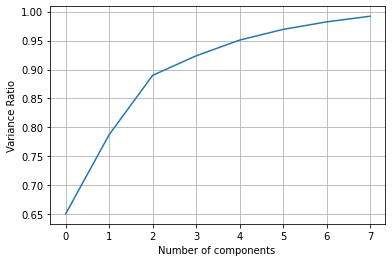

In [431]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(comulative_variance)
plt.xlabel('Number of components ')
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [432]:
pca.explained_variance_ratio_

array([0.65053863, 0.13692767, 0.10244299, 0.03373661, 0.02718074,
       0.01847613, 0.01300707, 0.00974055])

In [433]:
pca_data=pd.DataFrame(data=pca_components)


In [434]:
new_data=pd.concat([high_features,pca_data],axis=1)
print(new_data.shape)
new_data.head()

(113937, 18)


,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (Alpha)1,ProsperRating (Alpha)6,ProsperRating (Alpha)7,BorrowerRateTarget,0,1,2,3,4,5,6,7
0,0.168661,0.080306,0.096068,5.950067,640.000000,659.000000,0.0,0.0,0.0,0.1580,0.020170,0.317288,0.475570,-0.092045,-0.075194,-0.096036,0.009860,-0.019441
1,0.079600,0.024900,0.054700,7.000000,680.000000,699.000000,1.0,0.0,0.0,0.0920,-0.262235,0.013935,-0.061016,0.036835,0.011372,-0.028695,-0.027063,-0.008400
2,0.168661,0.080306,0.096068,5.950067,687.374006,706.374006,0.0,0.0,0.0,0.2750,0.863709,-0.017885,-0.060175,-0.035877,-0.071279,-0.062159,0.028995,0.019568
3,0.084900,0.024900,0.060000,9.000000,800.000000,819.000000,1.0,0.0,0.0,0.0974,-0.092423,0.248235,-0.151570,-0.002107,0.000063,-0.022734,0.033662,0.111428
4,0.183160,0.092500,0.090660,4.000000,680.000000,699.000000,0.0,0.0,0.0,0.2085,-0.245356,-0.015329,0.041562,0.039593,0.044213,0.001190,-0.043584,-0.004065


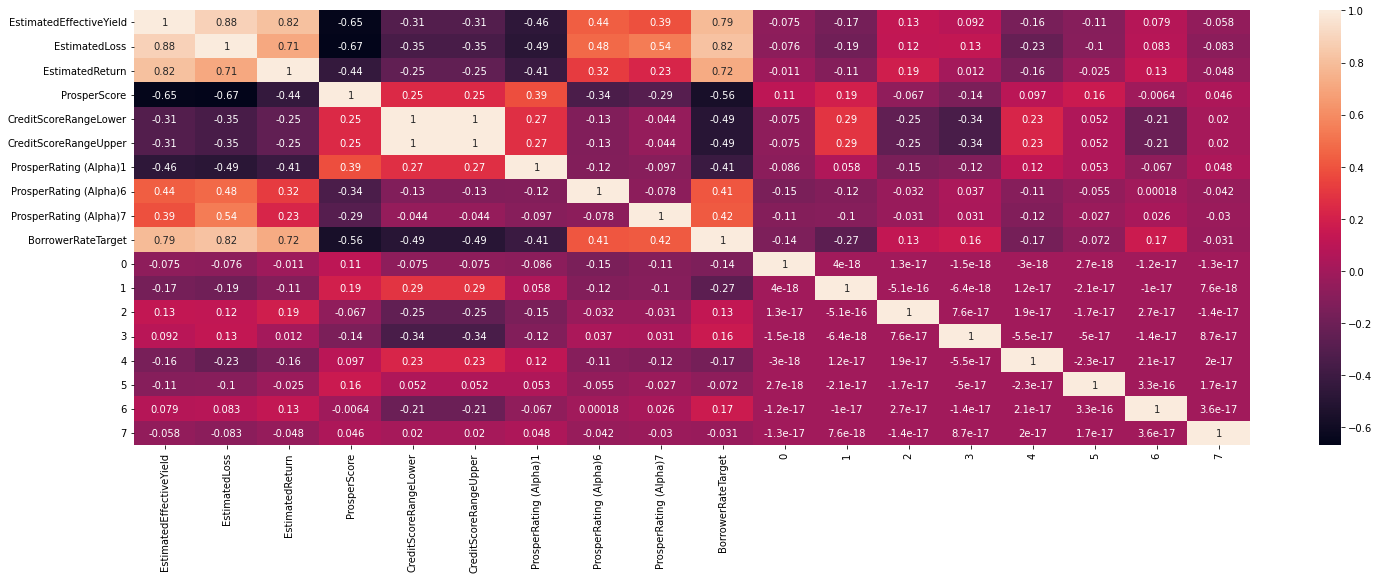

In [435]:
plt.figure(figsize=(25,8))
sns.heatmap(new_data.corr(),annot=True)

In [437]:
from sklearn.model_selection import train_test_split
X = new_data.drop('BorrowerRateTarget',axis=1) # Independet variable
y = new_data['BorrowerRateTarget'] # dependent variable
train_X,test_X,train_y,test_y = train_test_split(X,y)

In [440]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor(n_jobs=-1, random_state=42)

In [441]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math
y_pred=model.predict(train_X)
print("-"*10,"Train Pred","-"*10)
print("R2: ",r2_score(train_y,y_pred))
print("MAE: ",mean_absolute_error(train_y,y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(train_y,y_pred)))

y_pred=model.predict(test_X)
print("-"*10,"Test Pred","-"*10)
print("R2: ",r2_score(test_y,y_pred))
print("MAE: ",mean_absolute_error(test_y,y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(test_y,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


---------- Train Pred ----------
R2:  0.9853333144427323
MAE:  0.0033253529484982354
RMSE:  0.009064982898616096


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


---------- Test Pred ----------
R2:  0.9859455511522237
MAE:  0.0032564124367075982
RMSE:  0.00884474858043558
